# KNN for classifying patients with diabetes

### Load the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

### Load the diabetes dataset

In [2]:
df = pd.read_csv('diabetes.csv')

### Print the first 10 rows of the dataframe

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Shape of the dataset

In [4]:
df.shape

(768, 9)

### Describe the dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Create two dataframes for features and target variables

In [6]:
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

### Split the data set into training and testing data (70% Training)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Building a basic KNN model with K = 5

In [8]:
classifier = KNeighborsClassifier(n_neighbors=5)

### Fit the model on train data

In [9]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predict the test set results

In [10]:
y_pred = classifier.predict(X_test)

### Evaluation Metrics:

- Confusion Matrix
- Accuracy

### Build a confusion matrix

In [11]:
Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

[[125  25]
 [ 40  41]]


### Accuracy of the model

In [12]:
accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 71.86%


### Cross Validation

In [13]:
# Creating a list of K for KNN
# The model should consider K values from 1 till 50 with an interval of 2

In [14]:
k_list = list(range(1,50,2))

In [15]:
# Create a list of Average Accuracy for each Cross-validation

In [16]:
cv_scores = []

In [17]:
# Performing 10-fold cross validation

In [18]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())

In [19]:
# Plotting average Accuracy for all number of neighbors

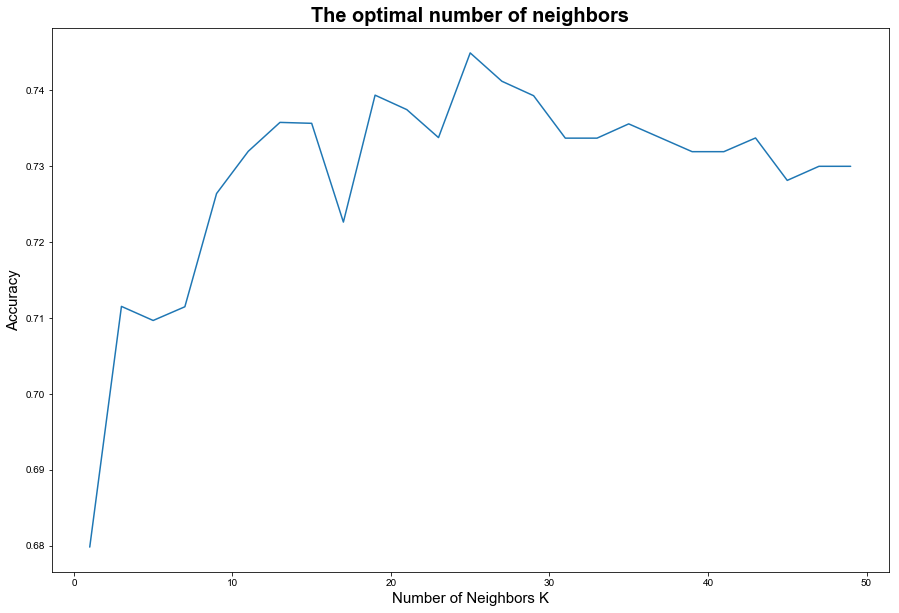

In [20]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()